<a href="https://colab.research.google.com/github/DanielaVizcarra/HANDS-ON-6-K-MEANS/blob/main/TAREA_HANDS_ON_6_K_MEANS_Vizcarra_Bernal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creamos nuestra clase Dataset con los datos que vamos a trabajar, ademas sus métodos getX y getY  que devuelven estas listas.

In [101]:
class Dataset:
    def __init__(self):
        self.X = [
            50, 80, 97, 45, 61, 52, 78, 58, 42, 76, 83, 69
        ]
        self.Y = [
            1.48, 1.82, 1.76, 1.55, 1.60, 1.87, 1.82, 1.68, 1.85, 1.72, 1.60, 1.59
        ]

    def getX(self):#Obtenemos el valor de X y Y, get accede a los datos de X y Y mietras que self.-  accede al atributo X o Y  instanciados dentro del objeto de la clase
        return self.X

    def getY(self):
        return self.Y

La clase kmeans tiene todos los metodos de implemnetacion que vamos a necesitar para trabajar con nuestro data set y los datos que cada lista contiene.
definimos k,inicializamos centroides, los clusters.

In [96]:
class KMeans:
    def __init__(self, k=3, max_iter=100, centroides_iniciales=None):
        # Parámetros del modelo K-Means
        self.k = k
        self.max_iter = max_iter
        self.centroides = centroides_iniciales or []

    def distancia(self, p1, p2):
        # Calculamos la distancia euclidiana entre dos puntos
        return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

    def asignar_clusters(self, data):
        # Asignamos cada punto al cluster cuyo centroide está más cercano
        clusters = []
        for punto in data:
            distancias = [self.distancia(punto, centroide) for centroide in self.centroides]
            cluster_asignado = distancias.index(min(distancias))
            clusters.append(cluster_asignado)
        return clusters

    def actualizar_centroides(self, data, clusters):
        # se actualiza los centroides de los clusters basándose en los puntos asignados a cada cluster
        nuevos_centroides = []
        for i in range(self.k):
            puntos_cluster = [data[j] for j in range(len(data)) if clusters[j] == i]
            if puntos_cluster:
                suma_puntos = [sum(p) for p in zip(*puntos_cluster)]
                nuevos_centroides.append([x / len(puntos_cluster) for x in suma_puntos])
            else:
                nuevos_centroides.append(data[0])  # Puedes cambiar esto según tus necesidades
        return nuevos_centroides

    def fit(self, data):
        # Ajusta el modelo K-Means a los datos dados, actualizando iterativamente los clusters y centroides
        if not self.centroides:
            raise ValueError("Debes proporcionar centroides iniciales.")

        for _ in range(self.max_iter):
            # Asigna los clústeres
            clusters = self.asignar_clusters(data)

            # Actualiza los centroides
            nuevos_centroides = self.actualizar_centroides(data, clusters)

            # Verificar convergencia para que no se cicle
            if self.centroides == nuevos_centroides:
                break

            self.centroides = nuevos_centroides

        return clusters

    def plot_clusters(self, data, clusters):
        # Visualizacion de los clusters y centroides en un gráfico de dispersión
        colores = ['#5dc1b9', '#572364',]
        for i in range(self.k):
            puntos_cluster = [data[j] for j in range(len(data)) if clusters[j] == i]
            plt.scatter([p[0] for p in puntos_cluster], [p[1] for p in puntos_cluster], c=colores[i], label=f'Cluster {i + 1}')

        plt.scatter([c[0] for c in self.centroides], [c[1] for c in self.centroides], c='black', marker='*', s=200, label='Centroides')
        plt.xlabel('PESO')
        plt.ylabel('ALTURA')
        plt.legend()
        plt.show()

Luego instanciamos la clase Dataset y obtenemos los datos de getx y gety


In [102]:
dataset = Dataset()
datos_x = dataset.getX()
datos_y = dataset.getY()

Combinamos los datos de X y Y para generar tuplas

In [103]:
datos = list(zip(datos_x, datos_y))
print("Datos:")
for dato in datos:
    print(dato)



Datos:
(50, 1.48)
(80, 1.82)
(97, 1.76)
(45, 1.55)
(61, 1.6)
(52, 1.87)
(78, 1.82)
(58, 1.68)
(42, 1.85)
(76, 1.72)
(83, 1.6)
(69, 1.59)


Crea una instancia del modelo K-Means con tres clusters y ajusta el modelo a los datos, utilizando los primeros tres puntos como centroides iniciales.

In [108]:
# Crear y ajustar el modelo KMeans
modelo_kmeans = KMeans(k=2, max_iter=100, centroides_iniciales=datos[:3])
clusters_resultantes = modelo_kmeans.fit(datos)



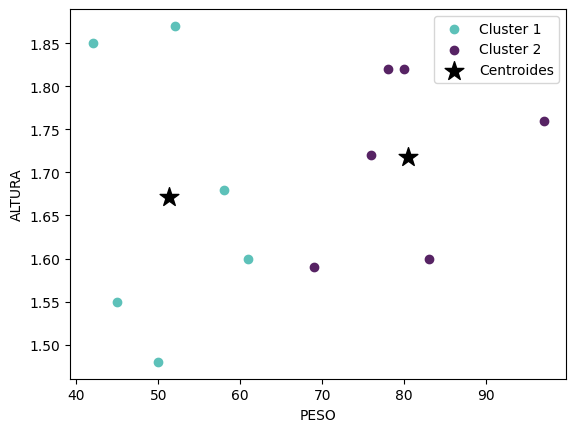

In [109]:
# Visualizar los resultados
modelo_kmeans.plot_clusters(datos, clusters_resultantes)